In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import io
import json
import random

from datasets import load_dataset
import pandas as pd

# subs_datasets

In [27]:
dataset_animal= pd.read_csv('/kaggle/input/subs-datasets/dataset_animal_03_06_2024.csv')
dataset_humano = pd.read_csv('/kaggle/input/subs-datasets/dataset_humano_03_06_2024.csv')
dataset_objeto = pd.read_csv('/kaggle/input/subs-datasets/dataset_objeto_03_06_2024.csv')
dataset_paisaje = pd.read_csv('/kaggle/input/subs-datasets/dataset_paisaje_03_06_2024.csv')

In [28]:
# transformacion de los dataset para leer los bytes
def formatear_cadena(x): # esto es necesario para que el string que contiene la imagen se interprete de forma correcta como una estructura de datos y poder acceder a los bytes
    return eval(x)

dataset_animal['image']=dataset_animal['image'].apply(formatear_cadena)
dataset_humano['image']=dataset_humano['image'].apply(formatear_cadena)
dataset_objeto['image']=dataset_objeto['image'].apply(formatear_cadena)
dataset_paisaje['image']=dataset_paisaje['image'].apply(formatear_cadena)

In [3]:
dataset_animal.sample(2)

,Unnamed: 0.1,Unnamed: 0,image,question_id,question,choices,correct_choice_idx,direct_answers,difficult_direct_answer,rationales,etiqueta,categoria,cantidad_entidades,etiqueta_v5
543,3227,5408,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,KkFM8PnLLrLQG5aTCkkgZM,Where is this cat likely hanging out?,['park' 'backyard' 'playground' 'forest'],1,"['yard', 'picnic table', 'outside', 'yard', 'b...",False,['There appears to be a house in the backgroun...,cat,Animal,singular,cat
577,3492,5883,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,MGcRAAc64A7MDYzkNyFZLu,Actual color of zebra's stripe are?,['purple' 'white' 'green' 'black'],1,"['white', 'white black', 'black', 'black', 'wh...",False,['A typical zebra with black stripes is leani...,zebra,Animal,plural,zebra


## Funcion para modificar sujetos y singularidad

In [28]:
def modificar_y_mostrar(dataset,indice,sujeto=None,singularidad=None):
    # para mostrar imagen
    data_bytes = dataset['image'][indice]['bytes']
    bytes_io = io.BytesIO(data_bytes)

    # Abrir la imagen utilizando PIL (Python Imaging Library)
    image = Image.open(bytes_io)

    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
    if sujeto is not None:
        # Para modificar sujeto
        dataset.loc[indice,"etiqueta_v5"]=sujeto
    
    if singularidad is not None:
        # para modificar singularidad
        dataset.loc[indice,"cantidad_entidades"]=singularidad
    
    # print de confirmacion para ver si fue modificado correctamente
    print(f'el sujeto es {dataset["etiqueta_v5"][indice]} y singularidad es {dataset["cantidad_entidades"][indice]}')
    
    

# Modificacion de humanos

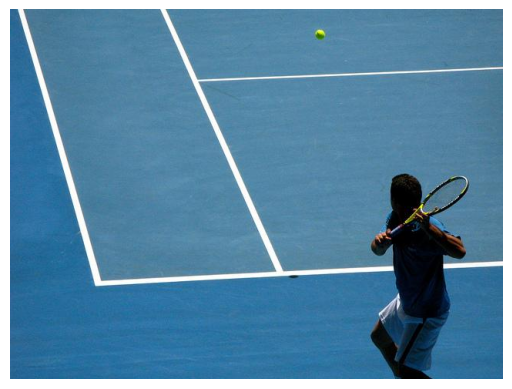

el sujeto es player y singularidad es singular


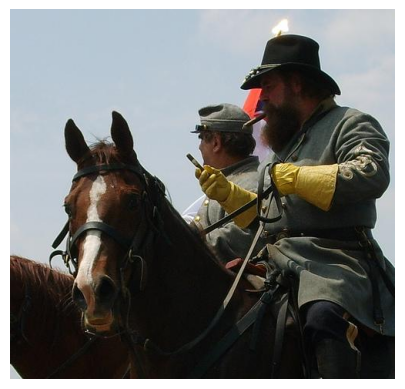

el sujeto es men y singularidad es plural


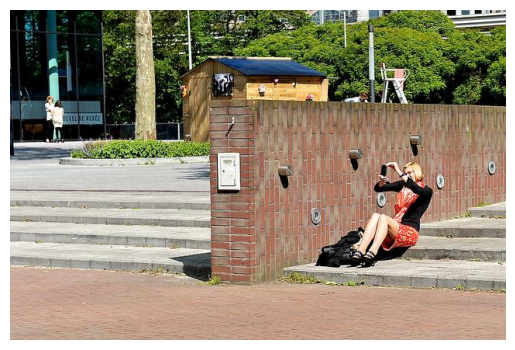

el sujeto es woman y singularidad es singular


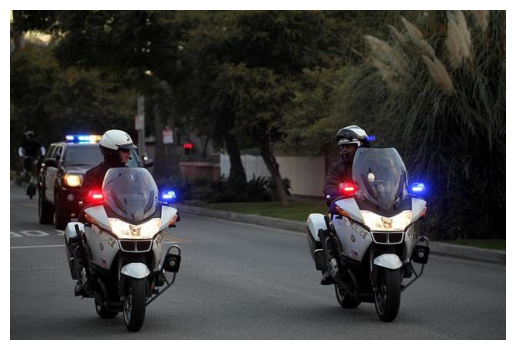

el sujeto es men y singularidad es singular


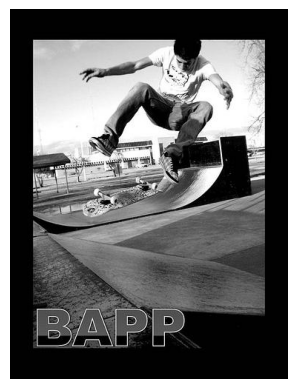

el sujeto es man y singularidad es singular


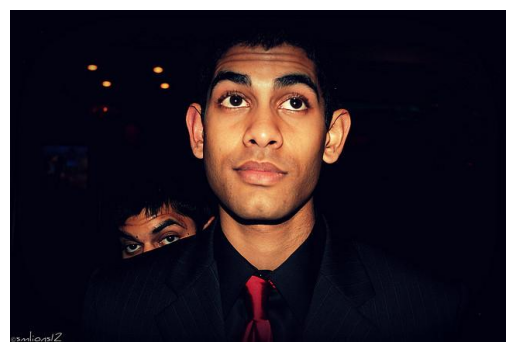

el sujeto es man y singularidad es singular


'     \n1222 (player, singular), 1225 (men, plural), 1227 (woman, singular), 1228, 1229 (men), 1231 (man), 1240 (man, singular)\n\n'

In [85]:
### modificar_y_mostrar(dataset_humano,90,"man")
#modificar_y_mostrar(dataset_humano,25,"woman")
#modificar_y_mostrar(dataset_humano,164,"kids","plural")
#modificar_y_mostrar(dataset_humano,221,"people")
#modificar_y_mostrar(dataset_humano,225,"men")
#modificar_y_mostrar(dataset_humano,235,"woman")
#modificar_y_mostrar(dataset_humano,249,"people")
#modificar_y_mostrar(dataset_humano,265,"men")
#modificar_y_mostrar(dataset_humano,304,"man")
#modificar_y_mostrar(dataset_humano,348,"man")
#modificar_y_mostrar(dataset_humano,357,None,"plural")
#modificar_y_mostrar(dataset_humano,358,"persons")
#modificar_y_mostrar(dataset_humano,382,"player")
#modificar_y_mostrar(dataset_humano,416,None,"plural")
#modificar_y_mostrar(dataset_humano,434,"men","plural")
#modificar_y_mostrar(dataset_humano,435,"men","plural")
#modificar_y_mostrar(dataset_humano,437,"girl")
#modificar_y_mostrar(dataset_humano,440,"persons","plural")
#modificar_y_mostrar(dataset_humano,445,"person")
#modificar_y_mostrar(dataset_humano,449,"man")
#modificar_y_mostrar(dataset_humano,463,"girls")
#modificar_y_mostrar(dataset_humano,468,"men","plural")
#modificar_y_mostrar(dataset_humano,474,"man")
#modificar_y_mostrar(dataset_humano,497,"woman")
#modificar_y_mostrar(dataset_humano,540,"players","plural")
#modificar_y_mostrar(dataset_humano,864,"man","singular")
#modificar_y_mostrar(dataset_humano,872,"boy","singular")
#modificar_y_mostrar(dataset_humano,875,"girl")
#modificar_y_mostrar(dataset_humano,876,"man")
#modificar_y_mostrar(dataset_humano,881,"person")
#modificar_y_mostrar(dataset_humano,883,"woman")
#modificar_y_mostrar(dataset_humano,875,"girl")
#modificar_y_mostrar(dataset_humano,891,"kids","plural")
#modificar_y_mostrar(dataset_humano,892,"driver","singular")
#modificar_y_mostrar(dataset_humano,896,"man")
#modificar_y_mostrar(dataset_humano,904,"player","singular")
#modificar_y_mostrar(dataset_humano,905,"kid","singular")
#modificar_y_mostrar(dataset_humano,905,"girl")
#modificar_y_mostrar(dataset_humano,907,"man")
#modificar_y_mostrar(dataset_humano,911,"woman")
#modificar_y_mostrar(dataset_humano,912,"woman")
#modificar_y_mostrar(dataset_humano,915,"woman")
#modificar_y_mostrar(dataset_humano,920,"men","plural")
#modificar_y_mostrar(dataset_humano,923,"woman")
#modificar_y_mostrar(dataset_humano,926,"men")
#modificar_y_mostrar(dataset_humano,915,"woman")
#modificar_y_mostrar(dataset_humano,929,"homeless")
#modificar_y_mostrar(dataset_humano,933,"man","singular")
#modificar_y_mostrar(dataset_humano,934,"man")
#modificar_y_mostrar(dataset_humano,915,"woman")
#modificar_y_mostrar(dataset_humano,935,"players","plural")
#modificar_y_mostrar(dataset_humano,939,"kid")
#modificar_y_mostrar(dataset_humano,940,"men")
#modificar_y_mostrar(dataset_humano,941,"kids","plural")
#modificar_y_mostrar(dataset_humano,946,"woman")
#modificar_y_mostrar(dataset_humano,955,"men","plural")
#modificar_y_mostrar(dataset_humano,959,"man","singular")
#modificar_y_mostrar(dataset_humano,963,"man","singular")
#modificar_y_mostrar(dataset_humano,967,"men","plural")
#modificar_y_mostrar(dataset_humano,971,"woman","plural")
#modificar_y_mostrar(dataset_humano,972,"kid")
#modificar_y_mostrar(dataset_humano,977,"men","plural")
#modificar_y_mostrar(dataset_humano,981,"boy","singular")
#modificar_y_mostrar(dataset_humano,982,"man")
#modificar_y_mostrar(dataset_humano,994,"man","singular")
#modificar_y_mostrar(dataset_humano,997,"man")
#modificar_y_mostrar(dataset_humano,998,"woman")
#modificar_y_mostrar(dataset_humano,1005,"man","singular")
#modificar_y_mostrar(dataset_humano,1007,"woman")
#modificar_y_mostrar(dataset_humano,1030,"boy")
#modificar_y_mostrar(dataset_humano,1036,"man","singular")
#modificar_y_mostrar(dataset_humano,1039,"man","singular")
#modificar_y_mostrar(dataset_humano,1040,"man")
#modificar_y_mostrar(dataset_humano,1042,"boys","plural")
#modificar_y_mostrar(dataset_humano,1043,"men","plural")
#modificar_y_mostrar(dataset_humano,1045,"men","plural")
#modificar_y_mostrar(dataset_humano,1047,"man")
#modificar_y_mostrar(dataset_humano,1059,"player")
#modificar_y_mostrar(dataset_humano,1060,"man")
#modificar_y_mostrar(dataset_humano,1062,"woman")
#modificar_y_mostrar(dataset_humano,1036,"man","singular")
#modificar_y_mostrar(dataset_humano,1068,"kid")
#modificar_y_mostrar(dataset_humano,1071,"policemen")
#modificar_y_mostrar(dataset_humano,1072,"man")
#modificar_y_mostrar(dataset_humano,1073,"man")
#modificar_y_mostrar(dataset_humano,1077,"man")
#modificar_y_mostrar(dataset_humano,1080,"men","plural")
#modificar_y_mostrar(dataset_humano,1087,"man","singular")
#modificar_y_mostrar(dataset_humano,1093,"man")
#modificar_y_mostrar(dataset_humano,1094,"kid")
#modificar_y_mostrar(dataset_humano,1098,"man")
#modificar_y_mostrar(dataset_humano,1100,"man","singular")
#modificar_y_mostrar(dataset_humano,1105,"man","singular")
#modificar_y_mostrar(dataset_humano,1114,"men")
#modificar_y_mostrar(dataset_humano,1117,"man")
#modificar_y_mostrar(dataset_humano,1131,"man")
#modificar_y_mostrar(dataset_humano,1135,"woman")
#modificar_y_mostrar(dataset_humano,1140,"women","plural")
#modificar_y_mostrar(dataset_humano,1142,"man","singular")
#modificar_y_mostrar(dataset_humano,1145,"woman")
#modificar_y_mostrar(dataset_humano,1149,"woman","singular")
#modificar_y_mostrar(dataset_humano,1152,"man")
#modificar_y_mostrar(dataset_humano,1153,"kids","plural")
#modificar_y_mostrar(dataset_humano,1157,"woman","singular")
#modificar_y_mostrar(dataset_humano,1160,"man")
#modificar_y_mostrar(dataset_humano,1161,"men")
#modificar_y_mostrar(dataset_humano,1162,"man","singular")
#modificar_y_mostrar(dataset_humano,1163,"woman","singular")
#modificar_y_mostrar(dataset_humano,1167,"man","singular")
#modificar_y_mostrar(dataset_humano,1171,"kid","singular")
#modificar_y_mostrar(dataset_humano,1174,"men","plural")
#modificar_y_mostrar(dataset_humano,1181,"player","singular")
#modificar_y_mostrar(dataset_humano,1195,"man")
#modificar_y_mostrar(dataset_humano,1197,"man","singular")
#modificar_y_mostrar(dataset_humano,1198,"player","singular")
#modificar_y_mostrar(dataset_humano,1201,"woman")
#modificar_y_mostrar(dataset_humano,1204,"lady","singular")
#modificar_y_mostrar(dataset_humano,1205,"player")
#modificar_y_mostrar(dataset_humano,1212,"player","singular")
#modificar_y_mostrar(dataset_humano,1222,"player","singular")
#modificar_y_mostrar(dataset_humano,1225,"men","plural")
#modificar_y_mostrar(dataset_humano,1227,"woman","singular")
#modificar_y_mostrar(dataset_humano,1229,"men")
#modificar_y_mostrar(dataset_humano,1231,"man")
#modificar_y_mostrar(dataset_humano,1240,"man","singular")

#-----------------------------------------------------------------------------
#Trato de '+-'
#modificar_y_mostrar(dataset_humano,28)
#modificar_y_mostrar(dataset_humano,44,"man")
#modificar_y_mostrar(dataset_humano,72,"players","plural")
#modificar_y_mostrar(dataset_humano,83,"baby")
#modificar_y_mostrar(dataset_humano,239,"players","plural")
#modificar_y_mostrar(dataset_humano,296,"player")
#modificar_y_mostrar(dataset_humano,337,"kids","plural")
#modificar_y_mostrar(dataset_humano,361,"girls","plural")
#modificar_y_mostrar(dataset_humano,367,"men","plural")
#modificar_y_mostrar(dataset_humano,337,"kids","plural")
#modificar_y_mostrar(dataset_humano,38)

#LOS QUE NO VAN
#----------
#modificar_y_mostrar(dataset_humano,40)
#modificar_y_mostrar(dataset_humano,240)
#modificar_y_mostrar(dataset_humano,433)

# Modificaciones Animal

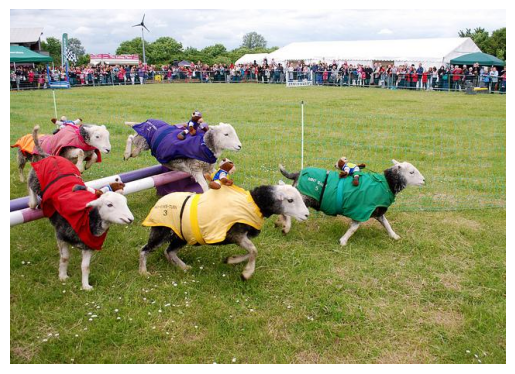

el sujeto es goats y singularidad es plural


In [46]:
#modificar_y_mostrar(dataset_animal,8,"dog")
#modificar_y_mostrar(dataset_animal,48,"sheep","plural")
#modificar_y_mostrar(dataset_animal,72,None,"plural")
#modificar_y_mostrar(dataset_animal,79,None,"plural")
#modificar_y_mostrar(dataset_animal,96,"horses")
#modificar_y_mostrar(dataset_animal,170,None,"plural")
#modificar_y_mostrar(dataset_animal,184,"horse")
#modificar_y_mostrar(dataset_animal,239,"horse","singular")
#modificar_y_mostrar(dataset_animal,260,"horses","plural")
#modificar_y_mostrar(dataset_animal,261,"elephants","plural")
#modificar_y_mostrar(dataset_animal,274,None,"plural")
#modificar_y_mostrar(dataset_animal,287,None,"plural")
#modificar_y_mostrar(dataset_animal,308,None,"plural")
#modificar_y_mostrar(dataset_animal,318,"elephants","plural")
#modificar_y_mostrar(dataset_animal,323,None,"plural")
#modificar_y_mostrar(dataset_animal,359,"cat","singular")
#modificar_y_mostrar(dataset_animal,387,None,"plural")
#modificar_y_mostrar(dataset_animal,308,None,"plural")
#modificar_y_mostrar(dataset_animal,410,"cat")
#modificar_y_mostrar(dataset_animal,427,None,"plural")
#modificar_y_mostrar(dataset_animal,506)
#modificar_y_mostrar(dataset_animal,525,"penguins")
#modificar_y_mostrar(dataset_animal,528,"bears")
#modificar_y_mostrar(dataset_animal,554,"dogs","plural")
#modificar_y_mostrar(dataset_animal,564,"dog","singular")
#modificar_y_mostrar(dataset_animal,574,"cats","plural")
#modificar_y_mostrar(dataset_animal,627,None,"plural")
#modificar_y_mostrar(dataset_animal,643,"cows","plural")
#modificar_y_mostrar(dataset_animal,645,"elephants","plural")
#modificar_y_mostrar(dataset_animal,745,"cats")
#modificar_y_mostrar(dataset_animal,764,"dogs","plural")
#modificar_y_mostrar(dataset_animal,792,None,"plural")
#modificar_y_mostrar(dataset_animal,798,None,"plural")
#modificar_y_mostrar(dataset_animal,798,None,"plural")
#---tratos de '+-'
#
#modificar_y_mostrar(dataset_animal,19,"elephants")
#modificar_y_mostrar(dataset_animal,31,"sheep")
#modificar_y_mostrar(dataset_animal,44,"cows","plural")
#modificar_y_mostrar(dataset_animal,142,"elephants","plural")
#modificar_y_mostrar(dataset_animal,327,"horses","plural
#modificar_y_mostrar(dataset_animal,739)
#modificar_y_mostrar(dataset_animal,803)
#modificar_y_mostrar(dataset_animal,813)



#LAS QUE NO VAN------------
#modificar_y_mostrar(dataset_animal,92)
#modificar_y_mostrar(dataset_animal,216) no se
#modificar_y_mostrar(dataset_animal,419)
#modificar_y_mostrar(dataset_animal,607)




# Modificacion Objeto

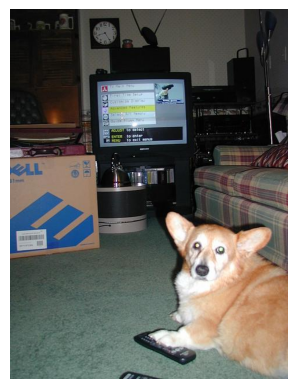

el sujeto es box y singularidad es singular


In [96]:
#modificar_y_mostrar(dataset_objeto,0,"frisbee","singular")
#modificar_y_mostrar(dataset_objeto,7,"cars","plural")
#modificar_y_mostrar(dataset_objeto,19,"bus","singular")
#modificar_y_mostrar(dataset_objeto,53,"bus","singular")
#modificar_y_mostrar(dataset_objeto,61,"airplane")
#modificar_y_mostrar(dataset_objeto,64,"bowl")
#modificar_y_mostrar(dataset_objeto,74,"bus")
#modificar_y_mostrar(dataset_objeto,76,"bus")
#modificar_y_mostrar(dataset_objeto,87,"table")
#modificar_y_mostrar(dataset_objeto,90,"lapto")
#modificar_y_mostrar(dataset_objeto,101,"structure")
#modificar_y_mostrar(dataset_objeto,102,"car")
#modificar_y_mostrar(dataset_objeto,110,"plane")
#modificar_y_mostrar(dataset_objeto,116,"beds","plural")
#modificar_y_mostrar(dataset_objeto,130,"truck")
#modificar_y_mostrar(dataset_objeto,143,"device")
#modificar_y_mostrar(dataset_objeto,144,"cars","plural")
#modificar_y_mostrar(dataset_objeto,155,None,"plural")
#modificar_y_mostrar(dataset_objeto,158,"motorcycle")
#modificar_y_mostrar(dataset_objeto,160,"disc")
#modificar_y_mostrar(dataset_objeto,175,"hat")
#modificar_y_mostrar(dataset_objeto,176,"bus")
#modificar_y_mostrar(dataset_objeto,177,"bananas","plural")
#modificar_y_mostrar(dataset_objeto,180,"balls")
#modificar_y_mostrar(dataset_objeto,189,"bus","singular")
#modificar_y_mostrar(dataset_objeto,192,"truck")
#modificar_y_mostrar(dataset_objeto,204,"mirror")
#modificar_y_mostrar(dataset_objeto,209,"inflatable mattress")
#modificar_y_mostrar(dataset_objeto,224,"airplane")
#modificar_y_mostrar(dataset_objeto,226,None,"singular")
#modificar_y_mostrar(dataset_objeto,252,None,"plural")
#modificar_y_mostrar(dataset_objeto,257,"umbrella")
#modificar_y_mostrar(dataset_objeto,267,"keyboards")
#modificar_y_mostrar(dataset_objeto,310,"bus")
#modificar_y_mostrar(dataset_objeto,314,"traffic lights","plural")
#modificar_y_mostrar(dataset_objeto,315,"traffic light")
#modificar_y_mostrar(dataset_objeto,324,"umbrella")
#modificar_y_mostrar(dataset_objeto,352,"remote console")
#modificar_y_mostrar(dataset_objeto,361,"car","plural")
#modificar_y_mostrar(dataset_objeto,363,"doors")
#modificar_y_mostrar(dataset_objeto,391,"scissors","singular")
#modificar_y_mostrar(dataset_objeto,398,"car")
#modificar_y_mostrar(dataset_objeto,409,"fruits")
#modificar_y_mostrar(dataset_objeto,416,"vehicle")
#modificar_y_mostrar(dataset_objeto,424,"red bottom")
#modificar_y_mostrar(dataset_objeto,433,"table","singular")
#modificar_y_mostrar(dataset_objeto,440,"train")
#modificar_y_mostrar(dataset_objeto,464,"traffic light")
#modificar_y_mostrar(dataset_objeto,476,"boats","plural")
#modificar_y_mostrar(dataset_objeto,482,"truck","singular")
#modificar_y_mostrar(dataset_objeto,363,"doors")
#modificar_y_mostrar(dataset_objeto,528,"car","plural")
#modificar_y_mostrar(dataset_objeto,531,"bike","singular")
#modificar_y_mostrar(dataset_objeto,559,"hats","plural")
#modificar_y_mostrar(dataset_objeto,572,"plate")
#modificar_y_mostrar(dataset_objeto,581,"boats","plural")
#modificar_y_mostrar(dataset_objeto,593,"ball")
#modificar_y_mostrar(dataset_objeto,597,"ball")
#modificar_y_mostrar(dataset_objeto,605,"disc")
#modificar_y_mostrar(dataset_objeto,606,"clock","singular")
#modificar_y_mostrar(dataset_objeto,619,"truck")
#modificar_y_mostrar(dataset_objeto,657,"bus")
#modificar_y_mostrar(dataset_objeto,665,"remote control","singular")
#modificar_y_mostrar(dataset_objeto,675,"skateboards","plural")
#modificar_y_mostrar(dataset_objeto,688,"tower")
#modificar_y_mostrar(dataset_objeto,703,"hat")
#modificar_y_mostrar(dataset_objeto,706,"boat","singular")
#modificar_y_mostrar(dataset_objeto,716,"bus")
#modificar_y_mostrar(dataset_objeto,725,"bus","singular")
#modificar_y_mostrar(dataset_objeto,730,"plane","singular")
#modificar_y_mostrar(dataset_objeto,743,"skateboard")
#modificar_y_mostrar(dataset_objeto,768,"bicycle")
#modificar_y_mostrar(dataset_objeto,780,"cars","plural")
#modificar_y_mostrar(dataset_objeto,789,"bus")
#modificar_y_mostrar(dataset_objeto,799,"bench")
#modificar_y_mostrar(dataset_objeto,800,"train")
#modificar_y_mostrar(dataset_objeto,802,"bus")
#modificar_y_mostrar(dataset_objeto,808,"car")
#modificar_y_mostrar(dataset_objeto,809,"disc")
#modificar_y_mostrar(dataset_objeto,810,"tower")
#modificar_y_mostrar(dataset_objeto,811,"jacket")
#modificar_y_mostrar(dataset_objeto,821,"bed","singular")
#modificar_y_mostrar(dataset_objeto,835,"glass")
#modificar_y_mostrar(dataset_objeto,841,"car")
#modificar_y_mostrar(dataset_objeto,843,"boats","plural")
#modificar_y_mostrar(dataset_objeto,844,"plates","plural")
#modificar_y_mostrar(dataset_objeto,857,"plane")
#modificar_y_mostrar(dataset_objeto,862,"mirror")
#modificar_y_mostrar(dataset_objeto,867,"umbrella")
#modificar_y_mostrar(dataset_objeto,868,"kite")
#modificar_y_mostrar(dataset_objeto,873,"train")
#modificar_y_mostrar(dataset_objeto,878,"keyboard")
#modificar_y_mostrar(dataset_objeto,888,"plate")
#modificar_y_mostrar(dataset_objeto,889,"motorciclye","plural")
#--------------- tratos de '+-'---------
#
#modificar_y_mostrar(dataset_objeto,43,"train")
#modificar_y_mostrar(dataset_objeto,44,"oranges","plural")
#modificar_y_mostrar(dataset_objeto,45,"truck")
#modificar_y_mostrar(dataset_objeto,63,"frisbee")
#modificar_y_mostrar(dataset_objeto,67,"board")
#modificar_y_mostrar(dataset_objeto,103,"lapto")
#modificar_y_mostrar(dataset_objeto,119,"flags","plural")
#modificar_y_mostrar(dataset_objeto,132,"vases","plural")
#modificar_y_mostrar(dataset_objeto,145,"vases","plural")
#modificar_y_mostrar(dataset_objeto,218,"airplanes","plural")
#modificar_y_mostrar(dataset_objeto,229,"motorcycle","singular")
#modificar_y_mostrar(dataset_objeto,233,"vases","plural")
#modificar_y_mostrar(dataset_objeto,263,"train","singular")
#modificar_y_mostrar(dataset_objeto,331,"laptops","plural")
#modificar_y_mostrar(dataset_objeto,354,"train","singular")
#modificar_y_mostrar(dataset_objeto,378,"glass")
#modificar_y_mostrar(dataset_objeto,405)
#modificar_y_mostrar(dataset_objeto,454,"plate")
#modificar_y_mostrar(dataset_objeto,656)
#modificar_y_mostrar(dataset_objeto,712,"bus","singular")
#modificar_y_mostrar(dataset_objeto,815,"box")
modificar_y_mostrar(dataset_objeto,679)











#--LAS QUE NO VAN-----
#
#modificar_y_mostrar(dataset_objeto,59)
#modificar_y_mostrar(dataset_objeto,78)
#modificar_y_mostrar(dataset_objeto,97) # este pudiera ser bat
#modificar_y_mostrar(dataset_objeto,108) # puede ser tv
#modificar_y_mostrar(dataset_objeto,113)
#modificar_y_mostrar(dataset_objeto,124)
#modificar_y_mostrar(dataset_objeto,163)
#modificar_y_mostrar(dataset_objeto,165)
#modificar_y_mostrar(dataset_objeto,407)
#modificar_y_mostrar(dataset_objeto,679)







# Modificacion Paisaje

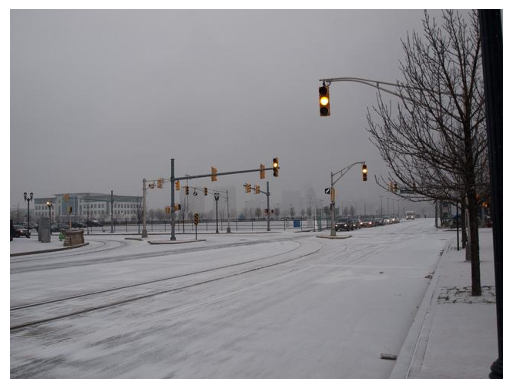

el sujeto es snow y singularidad es singular


In [12]:
#modificar_y_mostrar(dataset_paisaje,0,"rain")
#modificar_y_mostrar(dataset_paisaje,4,"beach","singular")
#modificar_y_mostrar(dataset_paisaje,5,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,17,"rocks","plural")
#modificar_y_mostrar(dataset_paisaje,33,"waves","plural")
#modificar_y_mostrar(dataset_paisaje,35,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,37,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,42,"water")
#modificar_y_mostrar(dataset_paisaje,43,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,47,"rails","plural")
#modificar_y_mostrar(dataset_paisaje,60,"tree")
#modificar_y_mostrar(dataset_paisaje,63,"trees")
#modificar_y_mostrar(dataset_paisaje,71,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,76,"terrain")
#modificar_y_mostrar(dataset_paisaje,77,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,103,"montain")
#modificar_y_mostrar(dataset_paisaje,106,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,107,"waves","plural")
#modificar_y_mostrar(dataset_paisaje,121,"lake","plural")
#modificar_y_mostrar(dataset_paisaje,124,"waves","plural")
#modificar_y_mostrar(dataset_paisaje,125,"water")
#modificar_y_mostrar(dataset_paisaje,146,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,149,"trees")
#modificar_y_mostrar(dataset_paisaje,153,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,155,"grass")
#modificar_y_mostrar(dataset_paisaje,157,"caves")
#modificar_y_mostrar(dataset_paisaje,158,"trees")
#modificar_y_mostrar(dataset_paisaje,159,"rocks")
#modificar_y_mostrar(dataset_paisaje,160,"ground")
#modificar_y_mostrar(dataset_paisaje,166,"montains","plural")
#modificar_y_mostrar(dataset_paisaje,168,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,177,"trees")
#modificar_y_mostrar(dataset_paisaje,178,"lake")
#modificar_y_mostrar(dataset_paisaje,179,"tide")
#modificar_y_mostrar(dataset_paisaje,185,"lake")
#modificar_y_mostrar(dataset_paisaje,186,"snow")
#modificar_y_mostrar(dataset_paisaje,188,"river")
#modificar_y_mostrar(dataset_paisaje,189,"tree")
#modificar_y_mostrar(dataset_paisaje,191,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,192,"iluminated circles")
#modificar_y_mostrar(dataset_paisaje,195,"snow")
#modificar_y_mostrar(dataset_paisaje,197,"snow")
#modificar_y_mostrar(dataset_paisaje,199,"monticule")
#modificar_y_mostrar(dataset_paisaje,202,"lake","singular")
#modificar_y_mostrar(dataset_paisaje,203,"snow")
#modificar_y_mostrar(dataset_paisaje,204,"lake")
#modificar_y_mostrar(dataset_paisaje,210,"lake")
#modificar_y_mostrar(dataset_paisaje,214,"pools")
#modificar_y_mostrar(dataset_paisaje,221,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,225,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,226,"grass")
#modificar_y_mostrar(dataset_paisaje,228,"pool","singular")
#modificar_y_mostrar(dataset_paisaje,229,"umbrellas","plural")
#modificar_y_mostrar(dataset_paisaje,230,"buildings","plural")
#modificar_y_mostrar(dataset_paisaje,231,"umbrella")
#modificar_y_mostrar(dataset_paisaje,232,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,234,"sea","plural")
#modificar_y_mostrar(dataset_paisaje,237,"flower","singular")
#modificar_y_mostrar(dataset_paisaje,239,"waves")
#modificar_y_mostrar(dataset_paisaje,240,"trees")
#modificar_y_mostrar(dataset_paisaje,241,"sand")
#modificar_y_mostrar(dataset_paisaje,242,"snow","singular")
#modificar_y_mostrar(dataset_paisaje,246,"grass","singular")
#modificar_y_mostrar(dataset_paisaje,255,"sea")
#modificar_y_mostrar(dataset_paisaje,257,"trees")
#modificar_y_mostrar(dataset_paisaje,260,"sand")
#modificar_y_mostrar(dataset_paisaje,268,"sea")
#modificar_y_mostrar(dataset_paisaje,274,"mound")
#modificar_y_mostrar(dataset_paisaje,281,"clouds")
#modificar_y_mostrar(dataset_paisaje,282,"snow")
#modificar_y_mostrar(dataset_paisaje,283,"montain")
#modificar_y_mostrar(dataset_paisaje,284,"mounds","plural")
#modificar_y_mostrar(dataset_paisaje,285,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,286,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,291,"sea")
#modificar_y_mostrar(dataset_paisaje,294,"lights")
#modificar_y_mostrar(dataset_paisaje,296,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,298,"river")
#modificar_y_mostrar(dataset_paisaje,299,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,304,"wave")
#modificar_y_mostrar(dataset_paisaje,308,"clouds","plural")
#modificar_y_mostrar(dataset_paisaje,309,"clouds")
#modificar_y_mostrar(dataset_paisaje,310,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,311,"montain")
#modificar_y_mostrar(dataset_paisaje,312,"river")
#modificar_y_mostrar(dataset_paisaje,313,"waves")
#modificar_y_mostrar(dataset_paisaje,315,"lake")
#modificar_y_mostrar(dataset_paisaje,318,"pool")
#modificar_y_mostrar(dataset_paisaje,321,"waves","plural")
#modificar_y_mostrar(dataset_paisaje,322,"snow")
#modificar_y_mostrar(dataset_paisaje,332,"trees")
#modificar_y_mostrar(dataset_paisaje,341,"snow")
#modificar_y_mostrar(dataset_paisaje,342,"lake")
#modificar_y_mostrar(dataset_paisaje,343,"sand","singular")
#modificar_y_mostrar(dataset_paisaje,346,"sand")
#modificar_y_mostrar(dataset_paisaje,347,"sand")
#modificar_y_mostrar(dataset_paisaje,348,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,349,"clouds","plural")
#modificar_y_mostrar(dataset_paisaje,350,"bushes","plural")
#modificar_y_mostrar(dataset_paisaje,352,"grass")
#modificar_y_mostrar(dataset_paisaje,353,"clouds")
#modificar_y_mostrar(dataset_paisaje,355,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,356,"bushes")
#modificar_y_mostrar(dataset_paisaje,362,"pool")
#modificar_y_mostrar(dataset_paisaje,367,"snow")
#modificar_y_mostrar(dataset_paisaje,368,"field")
#modificar_y_mostrar(dataset_paisaje,370,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,373,"bushes")
#modificar_y_mostrar(dataset_paisaje,377,"snow")
#modificar_y_mostrar(dataset_paisaje,378,"waves","plural")
#modificar_y_mostrar(dataset_paisaje,379,"river")
#modificar_y_mostrar(dataset_paisaje,380,"pools")
#modificar_y_mostrar(dataset_paisaje,382,"waves")
#modificar_y_mostrar(dataset_paisaje,383,"snow","singular")
#modificar_y_mostrar(dataset_paisaje,387,"trees")
#modificar_y_mostrar(dataset_paisaje,390,"clouds")
#modificar_y_mostrar(dataset_paisaje,391,"mound")
#modificar_y_mostrar(dataset_paisaje,393,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,394,"trees")
#modificar_y_mostrar(dataset_paisaje,412,"montain")
#modificar_y_mostrar(dataset_paisaje,413,"sand")
#modificar_y_mostrar(dataset_paisaje,417,"trees")
#modificar_y_mostrar(dataset_paisaje,419,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,420,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,422,"plants","plural")
#modificar_y_mostrar(dataset_paisaje,423,"river")
#modificar_y_mostrar(dataset_paisaje,424,"sand")
#modificar_y_mostrar(dataset_paisaje,426,"grass","singular")
#modificar_y_mostrar(dataset_paisaje,428,"wave","singular")
#modificar_y_mostrar(dataset_paisaje,430,"grass")
#modificar_y_mostrar(dataset_paisaje,431,"tree")
#modificar_y_mostrar(dataset_paisaje,433,"montains","plural")
#modificar_y_mostrar(dataset_paisaje,434,"montains","plural")
#modificar_y_mostrar(dataset_paisaje,438,"plants")
#modificar_y_mostrar(dataset_paisaje,440,"sea","singular")
#modificar_y_mostrar(dataset_paisaje,443,"snow")
#modificar_y_mostrar(dataset_paisaje,446,"lake","singular")
#modificar_y_mostrar(dataset_paisaje,447,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,448,"water")
#modificar_y_mostrar(dataset_paisaje,451,"trees")
#modificar_y_mostrar(dataset_paisaje,452,"bush","singular")
#modificar_y_mostrar(dataset_paisaje,454,"sea")
#modificar_y_mostrar(dataset_paisaje,456,"bush","singular")
#modificar_y_mostrar(dataset_paisaje,458,"wave","singular")
#modificar_y_mostrar(dataset_paisaje,459,"trees")
#modificar_y_mostrar(dataset_paisaje,460,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,461,"sand")
#modificar_y_mostrar(dataset_paisaje,463,"river")
#modificar_y_mostrar(dataset_paisaje,106,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,464,"clouds","plural")
#modificar_y_mostrar(dataset_paisaje,465,"lake")
#modificar_y_mostrar(dataset_paisaje,475,"palms","plural")
#modificar_y_mostrar(dataset_paisaje,477,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,484,"sand")
#modificar_y_mostrar(dataset_paisaje,485,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,489,"bushes","plural")
#modificar_y_mostrar(dataset_paisaje,495,"river")
#modificar_y_mostrar(dataset_paisaje,496,"snow")
#modificar_y_mostrar(dataset_paisaje,497,"trunks","plural")
#modificar_y_mostrar(dataset_paisaje,499,"mounds")
#modificar_y_mostrar(dataset_paisaje,501,"river")
#modificar_y_mostrar(dataset_paisaje,503,"waves","plural")
#modificar_y_mostrar(dataset_paisaje,511,"puddles","plural")
#modificar_y_mostrar(dataset_paisaje,513,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,518,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,519,"montain")
#modificar_y_mostrar(dataset_paisaje,520,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,523,"clouds","plural")
#modificar_y_mostrar(dataset_paisaje,525,"montain")
#modificar_y_mostrar(dataset_paisaje,529,"snow","singular")
#modificar_y_mostrar(dataset_paisaje,531,"sand","singular")
#modificar_y_mostrar(dataset_paisaje,541,"trees")
#modificar_y_mostrar(dataset_paisaje,555,"grass")
#modificar_y_mostrar(dataset_paisaje,557,"pool")
#modificar_y_mostrar(dataset_paisaje,558,"puddle")
#modificar_y_mostrar(dataset_paisaje,561,"grass")
#modificar_y_mostrar(dataset_paisaje,562,"lake","singular")
#modificar_y_mostrar(dataset_paisaje,567,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,571,"wave")
#modificar_y_mostrar(dataset_paisaje,573,"sand","singular")
#modificar_y_mostrar(dataset_paisaje,578,"river")
#modificar_y_mostrar(dataset_paisaje,588,"sand","singular")
#modificar_y_mostrar(dataset_paisaje,591,"snow")
#modificar_y_mostrar(dataset_paisaje,594,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,595,"trees")
#modificar_y_mostrar(dataset_paisaje,602,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,605,"grass","singular")
#modificar_y_mostrar(dataset_paisaje,608,"sand")
#modificar_y_mostrar(dataset_paisaje,616,"river")
#modificar_y_mostrar(dataset_paisaje,617,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,618,"snow")
#modificar_y_mostrar(dataset_paisaje,622,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,623,"snow")
#modificar_y_mostrar(dataset_paisaje,624,"trees")
#modificar_y_mostrar(dataset_paisaje,625,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,628,"river")
#modificar_y_mostrar(dataset_paisaje,634,"clouds","plural")
#modificar_y_mostrar(dataset_paisaje,637,"waves","plural")
#modificar_y_mostrar(dataset_paisaje,642,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,645,"clouds","plural")
#modificar_y_mostrar(dataset_paisaje,649,"river")
#modificar_y_mostrar(dataset_paisaje,656,"lake")
#modificar_y_mostrar(dataset_paisaje,659,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,660,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,661,"clouds")
#modificar_y_mostrar(dataset_paisaje,662,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,664,"snow")
#modificar_y_mostrar(dataset_paisaje,666,"montain")
#modificar_y_mostrar(dataset_paisaje,684,"lake")
#modificar_y_mostrar(dataset_paisaje,686,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,687,"lake","singular")
#modificar_y_mostrar(dataset_paisaje,689,"montains","plural")
#modificar_y_mostrar(dataset_paisaje,693,"lake")
#modificar_y_mostrar(dataset_paisaje,697,"lake","singular")
#modificar_y_mostrar(dataset_paisaje,699,"sea","singular")
#modificar_y_mostrar(dataset_paisaje,703,"rocks","plural")
#modificar_y_mostrar(dataset_paisaje,710,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,712,"bushes","plural")
#modificar_y_mostrar(dataset_paisaje,713,"clouds","plural")
#modificar_y_mostrar(dataset_paisaje,715,"snow","singular")
#modificar_y_mostrar(dataset_paisaje,718,"clouds","plural")
#modificar_y_mostrar(dataset_paisaje,720,"lake")
#----Tratamiento de '+-'
#modificar_y_mostrar(dataset_paisaje,114,"trees","plural")
#modificar_y_mostrar(dataset_paisaje,187,"montains","plural")
#modificar_y_mostrar(dataset_paisaje,280,"montains","plural")
#modificar_y_mostrar(dataset_paisaje,319,"field")
#modificar_y_mostrar(dataset_paisaje,336,"snow")



##LAS QUE NO VAN
#------------------------
#modificar_y_mostrar(dataset_paisaje,270)
#modificar_y_mostrar(dataset_paisaje,333,"lake")


# TODO: dar la vueelta a lo que tienen '+-'

# Listado de indices Humano

In [7]:
indices_humanos = [14,15,16,18,19,25,28,31,38, 39, 42,44,55,
56,60,61,64,65,72,73,81,82, 83, 89, 90 , 92,102,
103, 111,112, 114,115, 118, 120,141, 145,  146, 147, 150 , 154, 155, 164 , 
168, 175, 176, 177, 183, 184, 189, 191, 192, 195, 206, 208, 213, 219, 221 ,
226, 225, 226, 235 , 236, 237, 239 ,  245, 248, 249, 253, 256, 257, 258,
259, 263, 264, 265 , 266, 267, 276, 278, 285, 292, 295, 296, 297, 302, 303,
304, 306,  310, 315, 319, 323, 325, 329, 331, 335, 337 ,  342, 344, 347, 348 ,
349, 355, 356, 357 , 358 ,  360, 361, 366, 367, 371, 372, 373, 379, 382 , 383,
392, 393, 398, 403, 404, 405, 406, 408, 409, 411, 416 , 420, 424, 426, 427,
434 , 435 , 436, 437 , 440 , 443, 444, 445 , 449 , 452, 455, 459, 460, 463 ,
466, 468 , 471, 472, 474, 479, 480, 485, 486, 489, 493, 497 , 499, 504,  505,
510, 512,  517, 518, 521, 522, 524, 528, 529, 534, 535, 538, 540 , 543, 547,
854, 855, 864 , 872 , 875 , 876 , 881,
883 , 885 , 891 , 892 , 896 ,     
904 , 905 , 907 , 911 , 912 , 913,
915 , 918, 920 , 923 , 926 , 929 , 933,
934 , 935 , 939, 940 , 941 , 946 , 955,
959 , 963 , 967, 971 , 972 , 977,
981 , 982 , 987, 994 , 995, 997 , 998 , 1005 ,
1007 , 1013, 1015, 1016, 1019, 1021, 1023,  1029, 1030 , 1032, 1036 ,
1038, 1039 , 1040 , 1042 , 1043, 1045 , 1047 ,
1048, 1052, 1058, 1059 , 1060 , 1062 , 1068 , 1071 ,1072 , 1073, 1074 
                   
                  ]
''', 1077 , 1080 , 1084, 1087 , 1093 ,
1094, 1095, 1098 ,  1100, 1102,  1105 ,1114, 1117, 1119, 1124,    
1131, 1135  , 1140 , 1142 , 1145 , 1148,
1149 , 1150, 1152 ,  1153, 1157 , 1159, 1160,
1161 , 1162 , 1163 , 1167 , 1171,
1174 , 1179, 1181 , 1188, 1190, 1191, 1194, 1195 , 1197,
1198 , 1201 , 1203, 1204 , 1205 , 1212,  
1222 , 1225 , 1227 , 1228, 1229 , 1231 , 1240'''

print(len(indices_humanos)) # a seguir buscando no se que paso aqui.

250


# Listado indices animales

In [13]:
indices_animales= [
1, 3, 5, 7, 8, 9, 10, 12, 13, 14, 17, 18, 19 , 20, 23,

24, 25, 26, 28, 31 , 34, 36, 38, 39, 40, 41, 43, 44 , 48 , 49,

55, 56, 60, 67, 71, 72, 76, 77, 78, 79, 81, 85, 87, 89, 90,

93, 95, 96 , 97, 98, 101, 102, 103, 114, 116, 117, 120, 123, 129,

132, 133, 135, 136, 138, 139, 140, 142 , 147, 150, 151, 157, 158, 160, 167,

168, 169, 170 , 176, 181, 183, 184 , 189, 192, 195, 198, 199, 201, 202, 203,   

204, 207, 208, 211, 212, 215, 221, 222, 227, 223, 239 , 240, 242, 244, 

245, 248, 251, 252, 256, 260, 261, 264, 272, 273, 274 , 277, 281, 285, 287 ,

289, 293, 296, 299, 301, 305, 307, 308 , 309, 311, 314, 315, 318 , 319, 320,

321, 322, 323 , 324, 327 , 330, 331, 332, 339, 341, 342, 348, 350, 351, 352, 

353, 355, 356, 359 , 364, 369, 373, 374, 379, 380, 385, 386, 387 ,388, 392,  

395, 399, 408, 409, 410 , 411, 412, 417, 423, 425, 426, 427 , 428, 429, 

434, 435, 440, 448, 501, 502, 503, 506 , 507, 508, 509, 520, 523, 525 , 527, 

528 , 532, 534, 536, 539, 543, 544, 550, 551, 554 , 557, 559, 560, 564 ,565,

566, 568, 570, 574, 577, 579, 588, 592, 594, 598, 606, 611, 612, 613, 615, 617, 620, 627 , 629, 631, 633,
637, 642, 643 , 645 , 647, 649, 707, 713, 717, 726, 727, 730, 733, 739 , 742, 744, 745 , 749, 751, 755, 756, 763
]

'''

763,776, 780, 782, 783, 785, 788, 792 , 796, 797, 798 , 802, 803 , 805, 808, 809, 812, 813'''

print(len(indices_animales)) # reducir a 250

250


# Listado Indices Objetos

In [14]:
indices_objetos = [
0 , 7 , 11, 14, 19 , 22, 37, 43 , 44 , 45 , 47, 53, 54, 58,

61 , 62, 63 , 64 , 65, 67 , 71, 74 , 75, 76 , 77, 80, 85, 87 ,

90 , 95, 98, 101 , 102 , 103 , 110 , 111, 112, 116 , 118, 119 ,

120, 125, 126, 130 , 132 , 133, 139, 140, 141, 142, 143 , 144 ,145, 148,

154, 155 , 157, 158 , 160 , 173, 175 , 176 , 177 , 178, 180 , 181, 189,

190, 192 , 198, 202, 203, 204 , 209 , 216, 218 , 220, 222, 223, 224 , 226 , 228,

229 , 230, 231, 233 , 251, 252 , 257 , 263 , 267 , 274, 282, 291, 293, 299, 302,

306, 307, 309, 310 , 314, 315 , 317, 319, 323, 324, 329, 331, 333, 336, 344,

352 , 354 , 361 , 362, 363 , 364, 367, 371, 374, 378, 384, 386, 388, 390, 391,

398 , 403, 404, 405, 409 , 411, 412, 416, 424, 425, 431, 433, 440, 445,

449, 454 , 460, 463, 464, 475, 476, 478, 480, 482, 483, 484, 489, 490, 491,

499, 508, 519, 521, 528, 531, 535, 538, 539, 547, 559, 572, 581, 589, 591, 

593 , 597 , 601, 605 , 606 ,  608, 612, 614, 619 , 621, 628, 634, 645, 656 ,

657 , 658, 660, 665 , 666, 673, 674, 675, 688 , 697, 703 , 704, 705, 706,

708, 709, 710, 711, 712 , 713, 715, 716 , 722, 725 , 727, 730 , 733, 740, 743,

745, 746, 758, 759, 764, 767, 768, 770, 780, 783, 789, 799, 800, 802, 808,

809 , 810 , 811 , 815 , 821 , 828, 831, 835 , 841, 843 , 844 , 846, 847, 848, 849,

851, 853, 854, 857, 861, 862 
]

''', 863, 867 , 868 , 873 , 876, 878, 884, 888 , 889 ,

890'''

print(len(indices_objetos)) # reducir hasta llegar 250

250


# Listado indices paisajes

In [15]:
indices_paisajes=[

0 , 1, 4 , 5 , 17 , 33 , 35 , 37, 42 , 43 , 44, 46, 47 , 53, 60 ,

63 , 71 , 76, 77 , 79, 103, 106 , 107 , 113, 114 , 116, 121 , 122, 124 , 125 ,

126, 127, 141, 146 , 149 , 153 , 155 , 157 , 158, 159 , 160 , 166, 168 , 169, 170,

172, 174, 177 , 178 , 179 , 185 , 186 , 187 , 188 , 189 , 191 , 192 , 195 , 197 , 199 ,

201, 202 , 203 , 204, 205, 210 , 214 , 216, 221 , 225 , 226, 228 , 229, 230 , 231,

232 , 234 , 237 , 239, 240 , 241 , 242 , 246 , 255 , 257, 260 , 268, 273, 274 ,

280 , 281 , 282 , 283 , 284 , 285, 286 , 289, 291 , 294, 296, 298 , 299 , 304 , 307,

308 ,  309 , 310 , 311 , 312 , 313 , 315 , 318 , 319 , 321 , 322 , 330, 332 , 336 ,

341 , 342 , 343 , 346, 347, 348 , 349, 350 , 352 , 353 , 355 , 356 , 362 , 367 , 368 ,

370 , 373, 374, 377 , 378 , 379 , 380 , 382 , 383 , 387 , 390 , 391 , 392, 393 , 394 ,

412, 413 , 417 , 419 , 420 , 422 , 423 , 424, 425, 426 , 428 , 430 , 431 , 433 , 434 ,

438 , 440, 443 , 446 , 447 , 448 , 451 , 452 , 454, 456 , 458 , 459 , 460, 461, 463,

464 , 465 , 470, 475 , 477 , 484, 485, 488, 489 , 490, 494, 495 , 496 , 497 , 499 ,

501 , 503 , 511 , 513 , 518 , 519 , 520 , 523 , 524, 525 , 529 , 531 , 541, 555 , 557,

558 , 561 , 562 , 567 , 571, 573 , 578, 588 , 591 , 594 , 595 , 602 , 605 , 608 , 616 ,

617 , 618 , 622 , 623 , 624 , 625 , 628 , 634 , 637, 642 , 645 , 649 , 656 , 659, 660,

661 , 662 , 664 , 666 , 684 , 686 , 687 , 689, 693 , 697 , 699 , 703
]
''', 710 , 712 , 713 , 715 , 718 , 720 '''

print(len(indices_paisajes))

250


In [17]:
# creando los datasets de 250
dataset_humanos_250=dataset_humano.loc[indices_humanos]
dataset_animal_250=dataset_animal.loc[indices_animales]
dataset_objeto_250=dataset_objeto.loc[indices_objetos]
dataset_paisaje_250=dataset_paisaje.loc[indices_paisajes]

In [24]:
# guardando los indices por prevenir
dataset_humanos_250.loc[:,"indices_originales"]= indices_humanos
dataset_animal_250.loc[:,"indices_originales"]= indices_animales
dataset_objeto_250.loc[:,"indices_originales"]= indices_objetos
dataset_paisaje_250.loc[:,"indices_originales"]= indices_paisajes


In [25]:
dataset_paisaje_250.sample(2)

,Unnamed: 0.1,Unnamed: 0,image,question_id,question,choices,correct_choice_idx,direct_answers,difficult_direct_answer,rationales,etiqueta,categoria,cantidad_entidades,etiqueta_v5,indices_originales
594,5753,9642,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,ZetnyCtNCrmuQj76GetABc,What kind of road is this one?,['intersection' 'highway' 'expressway' 'one way'],0,"['intersection', 'forked road', 'two way', 'wi...",True,['A small road has crisscrosses and goes to ot...,road,Landscape,plural,trees,594
310,2803,4732,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,HTermTSY2gysrs2aBa2D7z,This street is located in what continent?,['africa' 'europe' 'asia' 'america'],2,"['asia', 'asia', 'asia', 'unknown', 'asia', 'i...",False,['The bus has writing from an indo-aryan langu...,what continent,Landscape,plural,trees,310


In [ ]:
# TODO:
#quedar con las columnas , image, etiqueta_v5, categoria, cantidad_entidades, indices originales
#guardar dataset
#seguir con el dataset 2do dataset.

# Guardar dataset "sub_dataset_250_procesado"

In [1]:
# guardar los subsdatasets.
dataset_humanos_250.to_csv('dataset_humano_250_29_06_2024.csv')
dataset_animal_250.to_csv('dataset_animal_250_29_06_2024.csv')
dataset_objeto_250.to_csv('dataset_paisaje_250_29_06_2024.csv')
dataset_paisaje_250.to_csv('dataset_objeto_250_29_06_2024.csv')

In [2]:
#descargar los datasets
%cd /kaggle/working
from IPython.display import FileLink
FileLink('dataset_humano_250_29_06_2024.csv')

/kaggle/working


/kaggle/working/dataset_humano_250_29_06_2024.csv

In [3]:
FileLink('dataset_animal_250_29_06_2024.csv')

/kaggle/working/dataset_animal_250_29_06_2024.csv

In [4]:
FileLink('dataset_paisaje_250_29_06_2024.csv')

/kaggle/working/dataset_paisaje_250_29_06_2024.csv

In [5]:
FileLink('dataset_objeto_250_29_06_2024.csv')

/kaggle/working/dataset_objeto_250_29_06_2024.csv